In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity

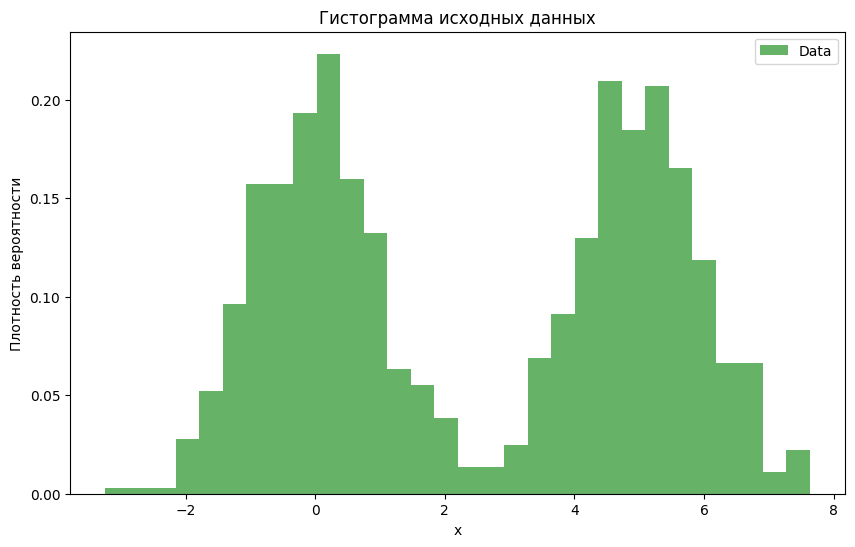

In [2]:
np.random.seed(42)

data1 = np.random.normal(0, 1, 500)
data2 = np.random.normal(5, 1, 500)
data = np.concatenate([data1, data2])

x = np.linspace(-3, 8, 1000).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.title('Гистограмма исходных данных')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

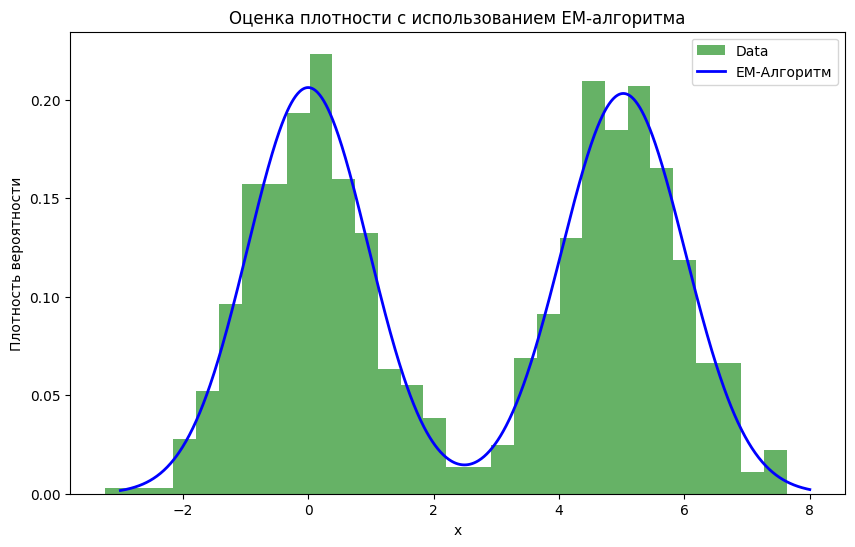

In [3]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data.reshape(-1, 1))
x = np.linspace(-3, 8, 1000).reshape(-1, 1)
gmm_pdf = np.exp(gmm.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
plt.title('Оценка плотности с использованием EM-алгоритма')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

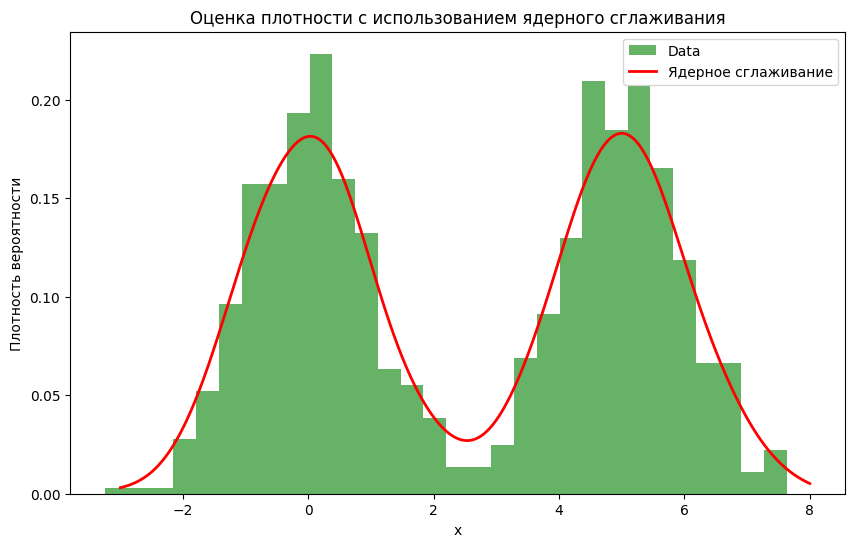

In [4]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data.reshape(-1, 1))
kde_pdf = np.exp(kde.score_samples(x))

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, kde_pdf, label='Ядерное сглаживание', color='r', lw=2)
plt.title('Оценка плотности с использованием ядерного сглаживания')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Визуализация результатов #

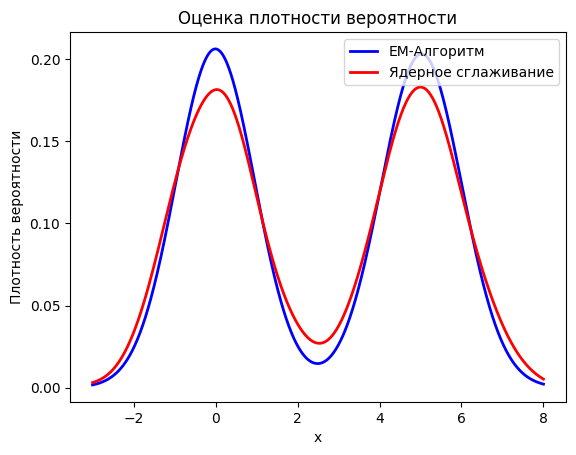

In [5]:
plt.plot(x, gmm_pdf, label='EM-Алгоритм', color='b', lw=2)
plt.plot(x, kde_pdf, label='Ядерное сглаживание', color='r', lw=2)
plt.legend()
plt.title('Оценка плотности вероятности')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.show()

Оба метода — EM-алгоритм и ядерное сглаживание — имеют свои сильные стороны и применимы в разных ситуациях. Выбор метода зависит от характера данных и целей анализа. EM-алгоритм подходит для случаев, когда данные состоят из нескольких компонент, а ядерное сглаживание — для более непрерывных и гладких оценок плотности.

### Метод Метрополиса-Гастингса (M-H) 

In [6]:
def metropolis_hastings(target_density, initial_point, n_samples, proposal_std):
    samples = [initial_point] 
    current = initial_point 
    for _ in range(n_samples):
        proposal = np.random.normal(current, proposal_std)
        
        acceptance_ratio = target_density(np.array([proposal])) / target_density(np.array([current]))
        acceptance_ratio = min(1, acceptance_ratio[0]) 
        
        if np.random.rand() < acceptance_ratio:
            samples.append(proposal)
            current = proposal
        else:
            samples.append(current) 
    return np.array(samples)

### Метод Гиббса для одномерного случая 

In [7]:
def gibbs_sampling(target_density, initial_point, n_samples):
    samples = [target_density]
    current =  np.array(target_density)
    for _ in range(n_samples - 1):
        for i, conditional in enumerate(initial_point):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)

### Графики 

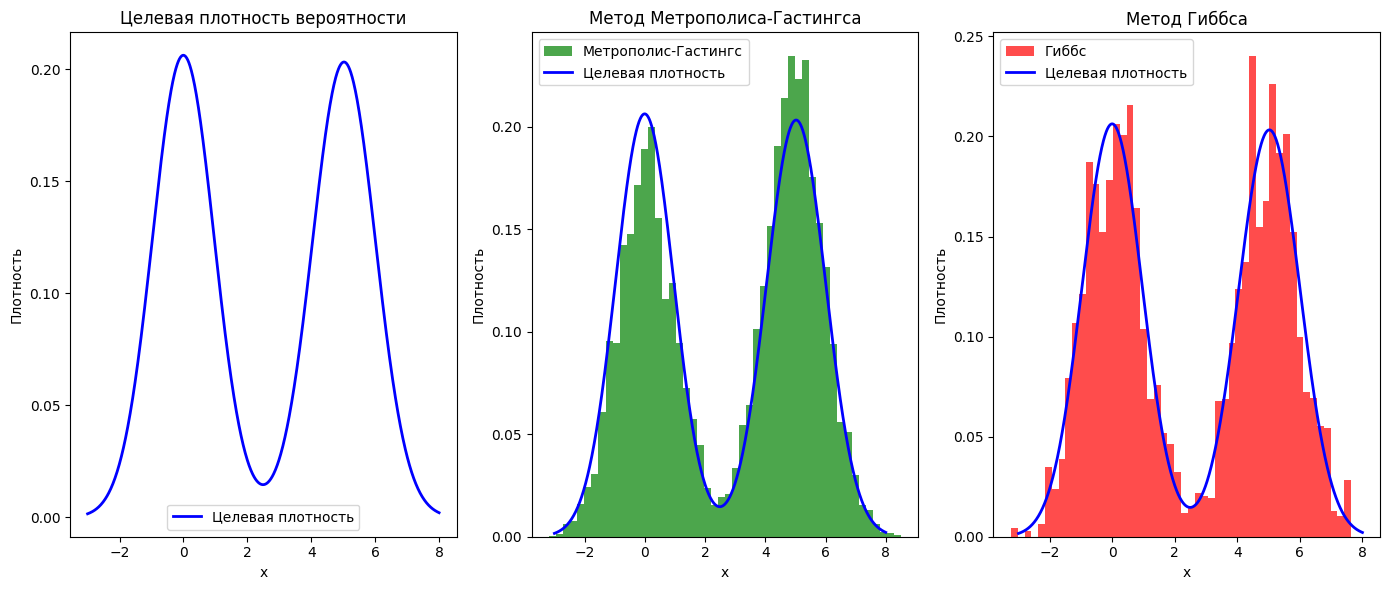

In [8]:
def target_density(x):
    return np.exp(gmm.score_samples(x.reshape(-1, 1)))

initial_point = data.mean()
n_samples = 10000
proposal_std = 1

mh_samples = metropolis_hastings(target_density, initial_point, n_samples, proposal_std)
gibbs_samples = gibbs_sampling([data.mean()], [lambda: np.random.choice(data)], n_samples)

x = np.linspace(-3, 8, 1000)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Целевая плотность вероятности')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(mh_samples, bins=50, density=True, alpha=0.7, color='g', label='Метрополис-Гастингс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Метрополиса-Гастингса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(gibbs_samples, bins=50, density=True, alpha=0.7, color='r', label='Гиббс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Гиббса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()


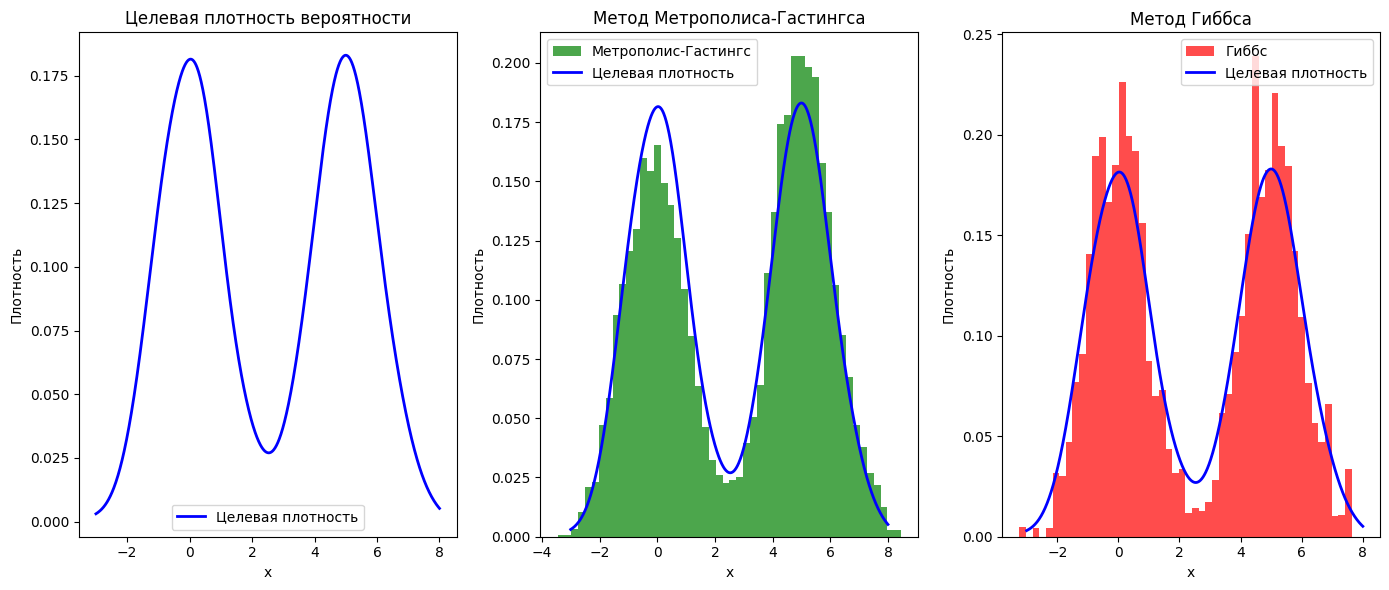

In [9]:
def target_density(x):
    return np.exp(kde.score_samples(x.reshape(-1, 1)))

initial_point = data.mean()
n_samples = 10000
proposal_std = 1

mh_samples = metropolis_hastings(target_density, initial_point, n_samples, proposal_std)
gibbs_samples = gibbs_sampling([data.mean()], [lambda: np.random.choice(data)], n_samples)

x = np.linspace(-3, 8, 1000)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Целевая плотность вероятности')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(mh_samples, bins=50, density=True, alpha=0.7, color='g', label='Метрополис-Гастингс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Метрополиса-Гастингса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(gibbs_samples, bins=50, density=True, alpha=0.7, color='r', label='Гиббс')
plt.plot(x, target_density(x), label='Целевая плотность', color='b', lw=2)
plt.title('Метод Гиббса')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
original_hist, _ = np.histogram(data, bins=30, density=True)
mh_hist, _ = np.histogram(mh_samples, bins=30, density=True)
gibbs_hist, _ = np.histogram(gibbs_samples, bins=30, density=True)

def kullback_leibler_distance(p, q):
    mask = (p > 0) & (q > 0)
    return np.sum(p[mask] * np.log(p[mask] / q[mask]))

kl_mh = kullback_leibler_distance(original_hist, mh_hist)
kl_gibbs = kullback_leibler_distance(original_hist, gibbs_hist)

print(f"Kullback-Leibler distance (MH): {kl_mh}")
print(f"Kullback-Leibler distance (Gibbs): {kl_gibbs}")

Kullback-Leibler distance (MH): 0.4753251332759651
Kullback-Leibler distance (Gibbs): 0.003665052593199338
